# Assignment 04
# Name: Son Jeongseol
# ID: 20155093

# The purpose of this assignment is to cluster the given MNIST sets with varying k lables.

In [1]:
# First, import some APIs we should use for the project.
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# We have an mnist_test handwriting arabian number samples we can use for clustering. 
file = open("./mnist_test.csv", "r")
data = file.readlines()
file.close()


# .csv is a text format of a specific data field distributed with "commas". An open() function opens a selected file described as first argument. Since we just use the file for reading its data, we open the file in a read("r") mode. readlines() function enables us to deal with data from external file. Now we can deal with the mnist file through the list structure, named data, which holds the value of each mnist image sample.

In [3]:
def normalize(data):
    data_n = (data - min(data)) / (max(data) - min(data))
    return(data_n)

# The list data holds an integer value of mnist_test.csv. It is better transform each value type from integer to float, for normalizing the range of each value of the list data, so we implement a function named normalize() to  from 0 to 1. 

In [4]:
def computeDist(xv, yv):
    d = (xv - yv) ** 2
    s = np.sum(d)
    return(s)

# A computeDist() function computes the distance from x to y, literally. However, the operands we use, xv and yv, are not the scalars but the vector of an image. Thus the return value of this function holds the total distance between them,  e.g. a similarity between the two images.

In [5]:
s_row    = 28
s_col    = 28
num_image   = len(data)
count   = 0
list_im  = np.zeros((s_row * s_col,num_image), dtype=float)
list_lb  = np.zeros(num_image, dtype=int)
for line in data:
    line_data   = line.split(',')
    label       = line_data[0]
    img_v   = np.asfarray(line_data[1:])
    img_v   = normalize(img_v)
    list_lb[count]  = label
    list_im[:, count]  = img_v    
    count += 1

# s_row& s_col value sets the size of each image while num_image holds the value of the size of the list data using the len() function. We use the value count to know the total # of images. We create two lists above, named list_im & list_lb each. We will use the first one to store the normalized vector of each image data, while the second one to store a label for each. The first components of each vector shows the value of their labels, so we must store them to list_lb. The rest, the value of each pixel, must be stored to list_lb after normalized.

In [6]:
list_dist= np.zeros((10*100,10),dtype=float)
j=0
for i in range(100):   
    list_dist[i,j]=computeDist((list_im[1:,13]),(list_im[1:,i])) 
    list_dist[i,j+1]=computeDist((list_im[1:,14]),(list_im[1:,i]))
    list_dist[i,j+2]=computeDist((list_im[1:,1]),(list_im[1:,i]))
    list_dist[i,j+3]=computeDist((list_im[1:,18]),(list_im[1:,i]))
    list_dist[i,j+4]=computeDist((list_im[1:,19]),(list_im[1:,i])) 
    list_dist[i,j+5]=computeDist((list_im[1:,15]),(list_im[1:,i]))
    list_dist[i,j+6]=computeDist((list_im[1:,11]),(list_im[1:,i])) 
    list_dist[i,j+7]=computeDist((list_im[1:,17]),(list_im[1:,i]))
    list_dist[i,j+8]=computeDist((list_im[1:,61]),(list_im[1:,i]))  
    list_dist[i,j+9]=computeDist((list_im[1:,9]),(list_im[1:,i]))
    for l in range(10):
        t=l
        d=list_dist[i,l]
        for f in range(10):
            if (list_dist[i,f]<list_dist[i,t]):
                t=f
        list_lb[i]=t


# The output of the computeDist() function is a scalar. We should compute all the distances between all mnist image data samples and ks, which are total 10 samples. The list list_dist holds these distance values. Above we use first 100 samples to test the result.

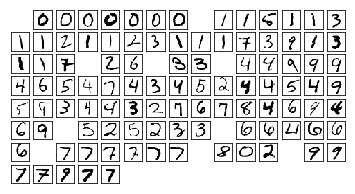

In [7]:
f = plt.figure(1)
s=1
for p in range(10):
    s=s+1
    for m in range(100):
        if (list_lb[m]==p):
            img_v = list_im[:, m]
            img_m = img_v.reshape((s_row, s_col))
            plt.subplot(10, 15, s)
            s=s+1
            plt.imshow(img_m, cmap='Greys', interpolation='None')
            frame   = plt.gca()
            frame.axes.get_xaxis().set_visible(False)
            frame.axes.get_yaxis().set_visible(False)    
plt.show()

# Finally, we can cluster the given sets with the closest distance and speculate the result. We can compute the accuracy when k=10:
## 0: 8/8, 1: 14/24, 2: 1/2, 3: 2/2, 4: 13/37, 5: 2/6, 6: 5/6, 7: 6/6, 8: 1/3, 9: 3/7
# The total accuracy is 0.707. Actually, the computeDist() function has a problem that we set each sample image for k clusters. Since it "compares" all the image data with those samples, the result shows us lower accuracy than just computing the autocorrelation with each other image samples. However, It has much lower overhead than computing the distance between one image and every other images.